Title

When you receive an email, your provider must decide whether it’s genuine or spam. This decision is made countless times every day, and one approach to solving it is logistic regression.

Logistic regression is a type of supervised machine learning algorithm that calculates the probability (between 0 and 1) of an observation belonging to a particular class. Based on this probability, the observation is assigned to the most likely category.

For instance, a logistic regression model could estimate the chance that a new email is spam. If the probability is above 0.5, the email would be flagged as spam. This setup, with only two possible outcomes, is known as binary classification.

Beyond email filtering, logistic regression can be applied in various areas:

* Determining whether a tumor is malignant.
* Predicting if a visitor on a sign-up page will become a customer.

In this lesson, you’ll practice building and applying logistic regression models. If you’re not familiar with linear regression, it’s helpful to review it first before moving forward.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Linear Regression Approach

At Codecademy University, the goal is to predict if a student will pass the final exam. In linear regression, the model takes the form:

y = b₀ + b₁x₁ + b₂x₂ + … + bₙxₙ

Here, y is the predicted outcome, b₀ is the intercept, b₁, b₂, … bₙ are the coefficients, and x₁, x₂, … xₙ represent the predictors or features.

In this case, y is a binary variable, either 1 (pass) or 0 (fail), and the single predictor x₁ is the number of hours studied. A linear regression line was fitted to the data, shown in red on the plot.

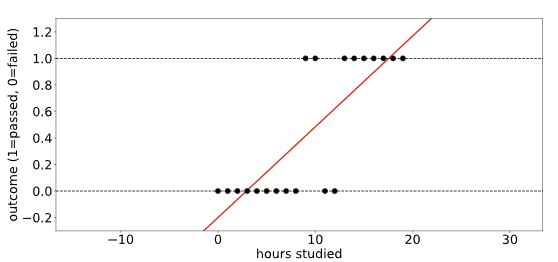

The issue is that this approach doesn’t align well with the task. Linear regression outputs values across the entire number line, while the problem requires predictions strictly in two categories: pass or fail.


# Logistic Regression

Linear regression outputs can take any value from negative to positive infinity, which doesn’t work well for classification tasks. Logistic regression addresses this issue.

Instead of fitting a straight line, it applies the **logit function** to transform the linear model into one that predicts probabilities. The linear form looks like:

y = b₀ + b₁x₁ + b₂x₂ + … + bₙxₙ

By applying the logit transformation, the model becomes:

ln(y / (1 − y)) = b₀ + b₁x₁ + b₂x₂ + … + bₙxₙ

For the student exam data, this means the model produces an S-shaped curve (the sigmoid function) that always stays between 0 and 1. These values can then be interpreted as probabilities of passing or failing.

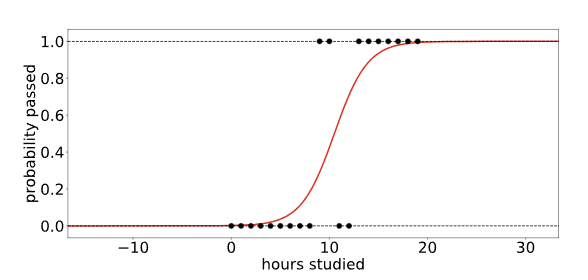

This technique cleverly adapts linear regression for classification, ensuring outputs are meaningful probabilities. Other link functions can also be used for different variations of this approach.


In [11]:
import pandas as pd
x_test = pd.read_csv('data_folder/weatherAUS_X_test.csv')
x_test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2016-09-01,Albury,8.5,16.7,0.4,NNE,17.0,NaN,NW,0.0,11.0,96.0,65.0,1020.0,1016.1,8.0,7.0,12.3,15.8,No
1,2016-09-02,Albury,6.1,13.9,0.2,SSE,37.0,S,E,6.0,7.0,87.0,76.0,1012.1,1005.6,NaN,8.0,10.1,13.5,No
2,2016-09-03,Albury,9.6,16.6,33.6,WNW,48.0,W,W,15.0,31.0,90.0,60.0,1003.4,1008.8,6.0,1.0,11.4,15.1,Yes
3,2016-09-04,Albury,7.7,15.1,0.6,NW,26.0,WSW,WNW,20.0,13.0,82.0,66.0,1023.7,1025.4,8.0,7.0,10.8,14.0,No
4,2016-09-05,Albury,4.4,15.9,0.0,W,24.0,ESE,WSW,4.0,13.0,93.0,63.0,1031.3,1029.1,8.0,7.0,10.4,14.7,No


In [18]:
# Count NaN values per column
x_test.isna().sum()

Date                0
Location            0
MinTemp            20
MaxTemp            12
Rainfall           83
WindGustDir       347
WindGustSpeed     347
WindDir9am        149
WindDir3pm        260
WindSpeed9am       21
WindSpeed3pm      248
Humidity9am       116
Humidity3pm       449
Pressure9am       605
Pressure3pm       606
Cloud9am         2566
Cloud3pm         3075
Temp9am            17
Temp3pm           355
RainToday          83
dtype: int64

In [12]:
y_test = pd.read_csv('data_folder/weatherAUS_y_test.csv')
y_test.head()

,Date,RainTomorrow
0,2016-09-01,No
1,2016-09-02,Yes
2,2016-09-03,No
3,2016-09-04,No
4,2016-09-05,No


In [13]:
# Fit the logistic regression model
clouds_x = x_test[['Cloud3pm']]
rain_y = y_test[['RainTomorrow']]

/home/alamanna1/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


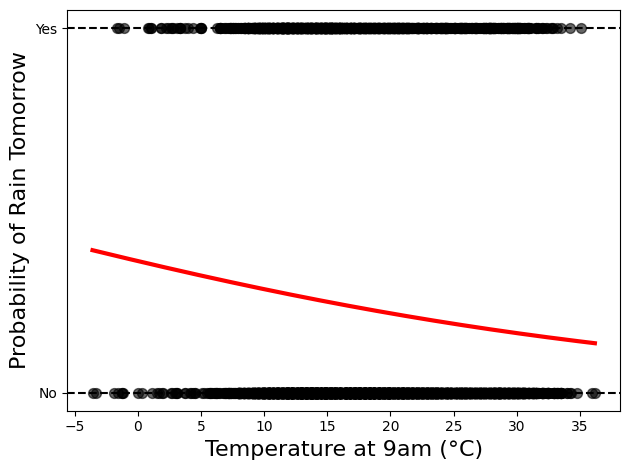

In [19]:
# Keep only rows where Temp9am (and label) are not NaN
mask = x_test['Temp9am'].notna() & y_test['RainTomorrow'].notna()
temp_x = x_test.loc[mask, ['Temp9am']]
rain_y = y_test.loc[mask, 'RainTomorrow']  # 1D series for sklearn

# Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(temp_x, rain_y)

# Smooth curve: sample across observed range
xmin, xmax = temp_x['Temp9am'].min(), temp_x['Temp9am'].max()
sample_x = np.linspace(xmin, xmax, 300).reshape(-1, 1)
probability = model.predict_proba(sample_x)[:, 1]

# Plot data points
plt.scatter(temp_x, rain_y, color='black', s=50, alpha=0.6)

# Plot logistic curve
plt.plot(sample_x, probability, color='red', linewidth=3)

# Ticks, guides, labels
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')
plt.xlabel('Temperature at 9am (°C)', fontsize=16)
plt.ylabel('Probability of Rain Tomorrow', fontsize=16)

# Nice x-limits with a small margin
pad = 0.05 * (xmax - xmin) if xmax > xmin else 1.0
plt.xlim(xmin - pad, xmax + pad)

plt.tight_layout()
plt.show()

# Log Odds
In logistic regression, the model equation is:

$$
\ln\left(\frac{p}{1-p}\right) = b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n
$$

* The left-hand side is called the **log-odds** (or logit).
* The right-hand side looks just like a **linear regression equation**.

Interpreting odds and log-odds

* **Odds** measure how likely an event is to happen compared to not happening:

$$
\text{Odds} = \frac{p}{1-p}
$$

* Example: if the probability of passing is $p = 0.7$, then the probability of failing is $1 - 0.7 = 0.3$.

  $$
  \text{Odds of passing} = \frac{0.7}{0.3} \approx 2.33
  $$

  This means the student is about **2.33 times more likely to pass than to fail**.

* Odds are always positive numbers.

When we apply the **natural log** to odds, we get **log-odds**, which can take on **any value between -∞ and +∞**.

This is crucial because:

* Probabilities $p$ are restricted between 0 and 1.
* Log-odds transform them into a continuous scale, making it possible to model with a linear function.

This transformation (probability → log-odds) is what allows logistic regression to link probabilities with a linear predictor.


In [1]:
import numpy as np

# Checkpoint 1:
# Suppose there is a 40% probability of rain today (p = 0.4).
# Calculate the odds of rain and save it as odds_of_rain.
# Since p < 0.5, the odds will be less than 1.
odds_of_rain = 0.4 / (1 - 0.4)
print(odds_of_rain)

# Checkpoint 2:
# Use the odds calculated above to compute the log odds of rain.
# Use numpy.log() to calculate the natural log.
# Since p < 0.5, the log odds will be negative.
log_odds_of_rain = np.log(odds_of_rain)
print(log_odds_of_rain)

# Checkpoint 3:
# Suppose there is a 90% probability that the train arrives on time (p = 0.9).
# Calculate the odds of the train being on time and save it as odds_on_time.
# Since p > 0.5, the odds will be greater than 1.
odds_on_time = 0.9 / (1 - 0.9)
print(odds_on_time)

# Checkpoint 4:
# Use the odds calculated above to compute the log odds of an on-time train.
# Use numpy.log() to calculate the natural log.
# Since p > 0.5, the log odds will be positive.
log_odds_on_time = np.log(odds_on_time)
print(log_odds_on_time)


0.6666666666666667
-0.4054651081081643
9.000000000000002
2.1972245773362196


## Sigmoid Funstion

The logistic regression equation can be expressed as:

ln(p / (1 − p)) = b₀ + b₁x₁ + b₂x₂ + … + bₙxₙ

As an example, consider predicting whether someone will make a purchase based on how long they stay on a website. Using scikit-learn, a logistic regression model is trained with the time spent as the predictor.

When applying the model, the raw outputs are **log odds**, which can take any value between negative and positive infinity. For instance, if the log odds are −3.28, this indicates a very low chance of purchasing.

To transform these values into probabilities, we use the **sigmoid function**, which maps log odds to values between 0 and 1. In Python, this is implemented as:

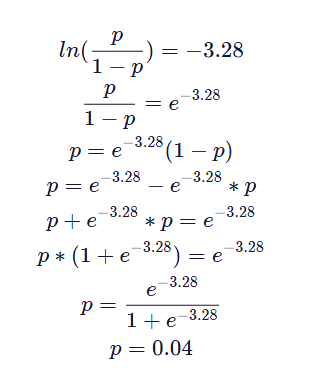

```python
np.exp(log_odds) / (1 + np.exp(log_odds))
```

This produces results that can be directly interpreted as probabilities, such as 0.04, 0.19, 0.49, 0.77, and 0.90 for the sample datapoints.
This formula turns the logit function, which ranges from minus to plus ifinity
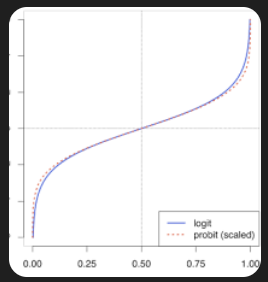
Into the Sigmoid function, which gives back values ranging from 0 to 1:
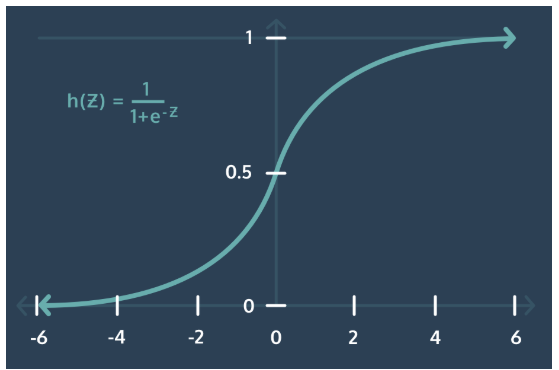

The sigmoid function is essentially the inverse of the logit function, shaping predictions into the familiar S-curve. This curve ensures probabilities remain bounded between 0 and 1, making logistic regression suitable for classification problems.


In [9]:
import pandas as pd
x_test = pd.read_csv('data_folder/weatherAUS_X_test.csv')
x_test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2016-09-01,Albury,8.5,16.7,0.4,NNE,17.0,NaN,NW,0.0,11.0,96.0,65.0,1020.0,1016.1,8.0,7.0,12.3,15.8,No
1,2016-09-02,Albury,6.1,13.9,0.2,SSE,37.0,S,E,6.0,7.0,87.0,76.0,1012.1,1005.6,NaN,8.0,10.1,13.5,No
2,2016-09-03,Albury,9.6,16.6,33.6,WNW,48.0,W,W,15.0,31.0,90.0,60.0,1003.4,1008.8,6.0,1.0,11.4,15.1,Yes
3,2016-09-04,Albury,7.7,15.1,0.6,NW,26.0,WSW,WNW,20.0,13.0,82.0,66.0,1023.7,1025.4,8.0,7.0,10.8,14.0,No
4,2016-09-05,Albury,4.4,15.9,0.0,W,24.0,ESE,WSW,4.0,13.0,93.0,63.0,1031.3,1029.1,8.0,7.0,10.4,14.7,No


In [10]:
y_test = pd.read_csv('data_folder/weatherAUS_y_test.csv')
y_test.head()

,Date,RainTomorrow
0,2016-09-01,No
1,2016-09-02,Yes
2,2016-09-03,No
3,2016-09-04,No
4,2016-09-05,No


In [3]:
df.head()

NameError: name 'df' is not defined

In [ ]:
# Fit the logistic regression model
hours_studied = codecademyU[['hours_studied']]
passed_exam = codecademyU[['passed_exam']]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(hours_studied,passed_exam)

# Save intercept and coef
intercept = model.intercept_
coef = model.coef_

# Calculate log_odds here
log_odds = intercept + coef * hours_studied
print(log_odds)

# Calculate pred_probability_passing here
pred_probability_passing = np.exp(log_odds) / (1 + np.exp(log_odds))
print(pred_probability_passing)

# Fitting a logistic regression model in scikit-learn follows the same workflow as linear regression:

from sklearn.linear_model import LogisticRegression

Create the model
model = LogisticRegression()

Fit the model on features (X) and labels (y)
model.fit(features, labels)

After fitting, useful attributes are available:

model.coef_ → the coefficients for each feature

model.intercept_ → the intercept (bias term)

Interpreting coefficients:

Large positive coefficient → increasing that feature increases the log-odds (and probability) of being in the positive class (labeled 1).

Large negative coefficient → increasing that feature decreases the probability of being in the positive class.

Coefficient close to 0 → the feature has little to no effect on the outcome.

⚠️ Important note: In scikit-learn, logistic regression applies regularization by default. Because of this, it’s recommended to standardize or normalize your features (e.g., using StandardScaler) before fitting the model, so that coefficients are comparable and training behaves as expected.

# Predictions in sklearn

Once a logistic regression model is trained in **scikit-learn**, we can make predictions in two main ways:

### 1. Predicting class labels

Use `.predict()` to output **0 or 1** depending on the model’s decision:

```python
print(model.predict(features))
# Example output: [0 1 1 0 0]
```

This applies the default threshold of **0.5** on the predicted probabilities.

---

### 2. Predicting probabilities

Use `.predict_proba()` to see the model’s estimated probabilities for each class:

```python
print(model.predict_proba(features)[:, 1])
# Example output: [0.32 0.75 0.55 0.20 0.44]
```

* The first column (`[:,0]`) corresponds to the probability of belonging to class **0**.
* The second column (`[:,1]`) corresponds to the probability of belonging to class **1** (the positive class).

---

### Thresholding

* By default, sklearn classifies a datapoint as **1** if the probability of class `1` is **≥ 0.5**, otherwise as **0**.
* Example: In the probabilities above, the second (0.75) and third (0.55) datapoints are classified as **1**, while the others are classified as **0**.

👉 The threshold of 0.5 is standard, but in practice it can be adjusted (e.g., for imbalanced datasets).


# Classification Threshold
In logistic regression, the classification threshold determines how probabilities are converted into class labels.

By default in scikit-learn, the threshold is 0.5:

If 
𝑃
(
class
=
1
)
≥
0.5
P(class=1)≥0.5 → assign to class 1

If 
𝑃
(
class
=
1
)
<
0.5
P(class=1)<0.5 → assign to class 0

Adjusting the threshold

The choice of threshold depends on the use case:

Medical diagnosis (e.g., cancer detection):
A lower threshold (like 0.3 or 0.4) increases sensitivity.

More patients with cancer are correctly flagged as positive.

Trade-off: more false positives (healthy patients incorrectly flagged).

Other applications:
In situations where false positives are more costly (e.g., fraud detection systems), we might prefer a higher threshold, making the model more conservative in predicting the positive class.

# Confusion matrix

A **confusion matrix** is a common tool to evaluate the performance of a classification model.

It compares the **true labels** with the **predicted labels** and summarizes results into four categories:

* **True Positives (TP):** correctly predicted positives
* **True Negatives (TN):** correctly predicted negatives
* **False Positives (FP):** negatives incorrectly classified as positives
* **False Negatives (FN):** positives incorrectly classified as negatives

---

### Example

```python
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 1, 1, 1, 0, 0, 1, 0, 1]
y_pred = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]

print(confusion_matrix(y_true, y_pred))
```

**Output:**

```
array([[3, 2],
       [1, 4]])
```

Interpretation:

* **3** → True Negatives (correctly predicted 0s)
* **2** → False Positives (predicted 1 but actually 0)
* **1** → False Negative (predicted 0 but actually 1)
* **4** → True Positives (correctly predicted 1s)

---

# Logistic Regression Metrics

Here’s a clear breakdown of the four metrics plus an **easy mnemonic** to remember them:

---

### 📊 The Metrics

* **Accuracy** = $(TP + TN) / (TP + FP + TN + FN)$
  → “Out of all predictions, how many were correct?”

* **Precision** = $TP / (TP + FP)$
  → “When I predict **positive**, how often am I right?”

* **Recall** = $TP / (TP + FN)$
  → “Out of all actual positives, how many did I catch?”

* **F1 Score** = harmonic mean of Precision & Recall
  → “Balance between being **precise** and **catching enough positives**.”

---

### 🧠 Mnemonic to Remember

Think of a **doctor diagnosing a disease**:

* **Accuracy** → “How often is the doctor right overall?”
* **Precision** → “When the doctor says *you are sick*, how often is that true?”
* **Recall** → “Of all the patients who are actually sick, how many did the doctor correctly find?”
* **F1 Score** → “What’s the balance between being careful (precision) and being thorough (recall)?”

👉 Quick phrase:
**“Precision is about trust, Recall is about coverage, Accuracy is about everything, F1 is about balance.”**

---

Would you like me to also show how these values look numerically on the earlier confusion matrix example so the mnemonic sticks better?
